# **Register Number:** 2200940

1. Common Codes
2. Method/model 1 Specific Codes
3. Method/model 2 Specific Codes
4. Other Method/model Codes, if any

# **Installing/Importing All Required Libraries**

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import pickle 
import os
import io 
import spacy
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
punctuations = string.punctuation
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

Assigning student id as a variable to set as seed 

In [3]:
student_id = 2200940
np.random.seed(student_id)

# **Common Codes**

Outline of this section,

* Reading all data files
* Splitting train data
* Defining Performance Matrics function
* Printing Dataset Statistics
* Data Visualization


First allowing the GDrive access and setting data and model paths

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = os.path.join('./CE807/Assignment2/',str(student_id)) # Make sure to update with your student_id and student_id is an integer
GOOGLE_DRIVE_PATH = os.path.join('gdrive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print('List files: ', os.listdir(GOOGLE_DRIVE_PATH))

train_file = os.path.join(GOOGLE_DRIVE_PATH, 'train.csv') # This is 100% of data
train_25_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_25.csv') # This is 25% of data
train_50_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_50.csv') # This is 50% of data
train_75_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_75.csv') # This is 75% of data
train_100_file = os.path.join(GOOGLE_DRIVE_PATH, 'train_100.csv') # This is also 100% of data as train.csv
  
######################################################################################3
print('-'*100)
print('Train file: ', train_file)
print('Train 25% file: ', train_25_file)
print('Train 50% file: ', train_50_file)
print('Train 75% file: ', train_75_file)
print('Train 100% file: ', train_100_file)

val_file = os.path.join(GOOGLE_DRIVE_PATH, 'valid.csv')
print('Validation file: ', val_file)

test_file = os.path.join(GOOGLE_DRIVE_PATH, 'test.csv')
print('Test file: ', test_file)

#################################################################################################################
print('-'*100)
MODEL_1_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '1') # Model 1 directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50') # Model 1 trained using 50% of train data directory
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)

MODEL_1_75_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'75') # Model 1 trained using 75% of train data directory
print('Model 1 directory with 75% data: ', MODEL_1_75_DIRECTORY)

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100') # Model 1 trained using 100% of train data directory
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)

#################################################################################################################
print('-'*100)
MODEL_2_DIRECTORY = os.path.join(GOOGLE_DRIVE_PATH, 'models', '2') # Model 1 directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50') # Model 1 trained using 50% of train data directory
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)

MODEL_2_75_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'75') # Model 1 trained using 75% of train data directory
print('Model 2 directory with 75% data: ', MODEL_2_75_DIRECTORY)

MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100') # Model 1 trained using 100% of train data directory
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)

#####################################################################################################################
print('-'*100)
model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)

model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 50% of train data 
print('Output file name using model 1 using 50% of train data: ',model_1_50_output_test_file)

model_1_75_output_test_file = os.path.join(MODEL_1_75_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 75% of train data 
print('Output file name using model 1 using 75% of train data: ',model_1_75_output_test_file)

model_1_100_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 100% of train data 
print('Output file name using model 1 using 100% of train data: ',model_1_100_output_test_file)

##########################################################################################################################
print('-'*100)
model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data 
print('Output file name using model 2 using 25% of train data: ',model_2_25_output_test_file)

model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 50% of train data 
print('Output file name using model 2 using 50% of train data: ',model_2_50_output_test_file)

model_2_75_output_test_file = os.path.join(MODEL_2_75_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 75% of train data 
print('Output file name using model 2 using 75% of train data: ',model_2_75_output_test_file)

model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 100% of train data 
print('Output file name using model 2 using 100% of train data: ',model_2_100_output_test_file)

List files:  ['test.csv', 'valid.csv', 'train.csv', 'models', 'train_75.csv', 'train_50.csv', 'train_100.csv', 'train_25.csv']
----------------------------------------------------------------------------------------------------
Train file:  gdrive/MyDrive/./CE807/Assignment2/2200940/train.csv
Train 25% file:  gdrive/MyDrive/./CE807/Assignment2/2200940/train_25.csv
Train 50% file:  gdrive/MyDrive/./CE807/Assignment2/2200940/train_50.csv
Train 75% file:  gdrive/MyDrive/./CE807/Assignment2/2200940/train_75.csv
Train 100% file:  gdrive/MyDrive/./CE807/Assignment2/2200940/train_100.csv
Validation file:  gdrive/MyDrive/./CE807/Assignment2/2200940/valid.csv
Test file:  gdrive/MyDrive/./CE807/Assignment2/2200940/test.csv
----------------------------------------------------------------------------------------------------
Model 1 directory:  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1
Model 1 directory with 25% data:  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/25
Model 1 directo

## Reading all data files

Here I am reading and printing the train, valid & test data files, where I am showing each data files, features and their shape.

In [6]:
train = pd.read_csv(train_file)
valid = pd.read_csv(val_file)
test = pd.read_csv(test_file)

print("-"*70)
print("\t\t\t\tTrain Data")
print("-"*70)
print(train)
print("-"*70)
print("\t\t\t\tValid Data")
print("-"*70)
print(valid)
print("-"*70)
print("\t\t\t\tTest Data")
print("-"*70)
print(test)
print("-"*70)

----------------------------------------------------------------------
				Train Data
----------------------------------------------------------------------
          id                                              tweet label
0      42884  @USER I’m done with you as well. An INTENTIONA...   NOT
1      92152  I now have over 6k followers.  Only 94k to go ...   NOT
2      65475  @USER Tom was bought! He is more interested in...   NOT
3      22144  @USER @USER Even her brother thinks she is a m...   OFF
4      81048  @USER @USER @USER @USER @USER I can understand...   OFF
...      ...                                                ...   ...
12308  92805  And Soros money in their pocket. #maga🇺🇸🇺🇸🇺🇸🇺🇸...   NOT
12309  35989  @USER ur a fucking dumbass fr. there’s no way ...   OFF
12310  30188  .@USER They both want you to believe in yourse...   NOT
12311  96815  @USER It's like a reading a leaflet from Antif...   OFF
12312  10460  @USER And they have some of the strictest gun ...   OFF

[1

## Splitting train data into 25%,50%,75%,100%

Firstly, I am splitting train data into four parts as each 25%. Then I am adding splitted data as required 25%, 50%,75% & 100%.

In [7]:
#split the data into four equal parts of 25% each
split_1, split_2, split_3, split_4 = np.array_split(train, 4)

train_25 = split_1
train_50 = pd.concat((train_25, split_2))
train_75 = pd.concat((train_50, split_3))
train_100 = pd.concat((train_75, split_4)) 

print("Original Train Data Shape:",train.shape)
print("-"*45)
print("Splitting train data into four equal parts:")
print("-"*45)
#print the shapes of the resulting splits
print("Split_1 Shape:",split_1.shape)  # should be (3078, 3)
print("Split_2 Shape:",split_2.shape)  # should be (3078, 3)
print("Split_3 Shape:",split_3.shape)  # should be (3078, 3)
print("Split_4 Shape:",split_4.shape)  # should be (3078, 3)
print("-"*45)
print("Adding the splitted data as required:")
print("-"*45)
print("Train 25% Shape:",train_25.shape)  # should be (3078, 3)
print("Train 50% Shape:",train_50.shape)  # should be (3078, 3)
print("Train 75% Shape:",train_75.shape)  # should be (3078, 3)
print("Train 100% Shape:",train_100.shape)# should be (3078, 3)



Original Train Data Shape: (12313, 3)
---------------------------------------------
Splitting train data into four equal parts:
---------------------------------------------
Split_1 Shape: (3079, 3)
Split_2 Shape: (3078, 3)
Split_3 Shape: (3078, 3)
Split_4 Shape: (3078, 3)
---------------------------------------------
Adding the splitted data as required:
---------------------------------------------
Train 25% Shape: (3079, 3)
Train 50% Shape: (6157, 3)
Train 75% Shape: (9235, 3)
Train 100% Shape: (12313, 3)


**Note:** The train data has splitted equally as each 25% and then added the splitted data as required file size.

### Saving the Splitted data


Here I am saving the different size of train data in the required directory path.

In [8]:
train_25.to_csv('/content/gdrive/MyDrive/CE807/Assignment2/2200940/' + 'train_25.csv', index=False)
train_50.to_csv('/content/gdrive/MyDrive/CE807/Assignment2/2200940/' + 'train_50.csv', index=False)
train_75.to_csv('/content/gdrive/MyDrive/CE807/Assignment2/2200940/' + 'train_75.csv', index=False)
train_100.to_csv('/content/gdrive/MyDrive/CE807/Assignment2/2200940/' + 'train_100.csv', index=False)

## Performance Matrics

Here I am defining the function to compute the performance matrics of all required data files like Accuracy, Recall (macro), Precision (macro), F1 (macro) and Confusion Matrix for the performance evaluation. 

In [9]:
def compute_performance(y_true, y_pred, split='test'):
    """
    prints different performance matrics like  Accuracy, Recall (macro), Precision (macro), and F1 (macro).
    This also display Confusion Matrix with proper X & Y axis labels.
    Also, returns F1 score

    Args:
        y_true: numpy array or list
        y_pred: numpy array or list
        split: str
        

    Returns:
        float
    """

    print('Computing different preformance metrics on', split,'set of Dataset')
    f1score=f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    cnf = confusion_matrix(y_true, y_pred)
    rec = recall_score(y_true, y_pred, average='macro')
    pre = precision_score(y_true, y_pred, average='macro')
    cls = classification_report(y_true, y_pred)

    print('-'*60)
    print('F1 Score(macro): ', f1score)
    print('Accuracy: ', acc)
    print('Confusion Matrix:')
    print(cnf)
    print('Precision(macro):', pre)
    print('Recall(macro):', rec)
    print('_________________________Classification Report__________________________')
    print(cls)
    print('-'*60)

    return f1score




## Dataset Statistics

Here, I am printing the quick summary of a data files, which includs its shape, data types, and memory usage by using **.info()**.

In [10]:
print('-'*40)
print("\t\tTrain Data")
print('-'*40)
train.info()
print('-'*40)
print("\t\tValid Data")
print('-'*40)
valid.info()
print('-'*40)
print('\t\tTest Data')
print('-'*40)
test.info()
print('-'*40)

----------------------------------------
		Train Data
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12313 entries, 0 to 12312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12313 non-null  int64 
 1   tweet   12313 non-null  object
 2   label   12313 non-null  object
dtypes: int64(1), object(2)
memory usage: 288.7+ KB
----------------------------------------
		Valid Data
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      927 non-null    int64 
 1   tweet   927 non-null    object
 2   label   927 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.9+ KB
----------------------------------------
		Test Data
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Ran

Here I am printing the summary statistics such as mean, median, mode, standard deviation, minimum, and maximum values of train,valid & test datas by using **.describe()**.

In [11]:
print('-'*30)
print("\tTrain Data")
print('-'*30)
print(train.describe())
print('-'*30)
print("\tValid Data")
print('-'*30)
print(valid.describe())
print('-'*30)
print('\tTest Data')
print('-'*30)
print(test.describe())
print('-'*30)

------------------------------
	Train Data
------------------------------
                 id
count  12313.000000
mean   54937.978640
std    26079.349786
min    10006.000000
25%    32275.000000
50%    54953.000000
75%    77777.000000
max    99986.000000
------------------------------
	Valid Data
------------------------------
                 id
count    927.000000
mean   54135.116505
std    26271.869731
min    10164.000000
25%    31895.000000
50%    53338.000000
75%    77082.500000
max    99981.000000
------------------------------
	Test Data
------------------------------
                 id
count    860.000000
mean   55250.965116
std    25908.602213
min    10252.000000
25%    31537.250000
50%    55865.500000
75%    78248.000000
max    99947.000000
------------------------------


**Note:** Only id feature is int type.

Here, I am displaying the frequency of each unique string value in a column of train,valid & test data files by using **.value_counts()**.

In [12]:
print('-'*30)
print("\tTrain Data")
print('-'*30)
print(train['label'].value_counts())
print('-'*30)
print("\tValid Data")
print('-'*30)
print(valid['label'].value_counts())
print('-'*30)
print('\tTest Data')
print('-'*30)
print(test['label'].value_counts())
print('-'*30)

------------------------------
	Train Data
------------------------------
NOT    8221
OFF    4092
Name: label, dtype: int64
------------------------------
	Valid Data
------------------------------
NOT    619
OFF    308
Name: label, dtype: int64
------------------------------
	Test Data
------------------------------
NOT    620
OFF    240
Name: label, dtype: int64
------------------------------


**Note:** From the above value count of label column, we can see that these data sets are imbalanced. So to balance this ,I am using the resampling method for which I have defined a function in the preprocessing part(given below in Method 1 section).

**Data Visualization**

Here, visualizing the distribution of label counts of train, valid & test datasets.

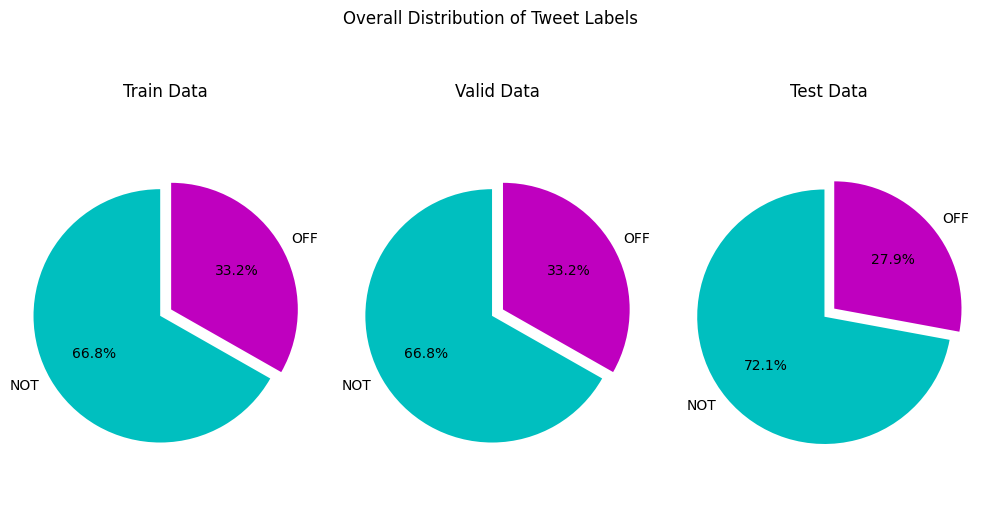

In [13]:
# Data for the pie charts
label_counts1 = train['label'].value_counts()
label_counts2 = valid['label'].value_counts()
label_counts3 = test['label'].value_counts()

# Create a figure with 3 subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
clr=['c','m']
myexplode = [0.1, 0]

# Plot the first pie chart
axs[0].pie(label_counts1, labels=label_counts1.index,explode = myexplode, colors= clr, autopct='%.1f%%', startangle=90)
axs[0].set_title('Train Data')
axs[0].axis('equal')

# Plot the second pie chart
axs[1].pie(label_counts2, labels=label_counts2.index,explode = myexplode, colors= clr, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Valid Data')
axs[1].axis('equal')

# Plot the third pie chart
axs[2].pie(label_counts3, labels=label_counts3.index,explode = myexplode, colors= clr, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Test Data')
axs[2].axis('equal')

# Add an overall title for the figure
fig.suptitle('Overall Distribution of Tweet Labels',y=1.05)

# Set the layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()




Here, visualizing sizes of splitted train data sets

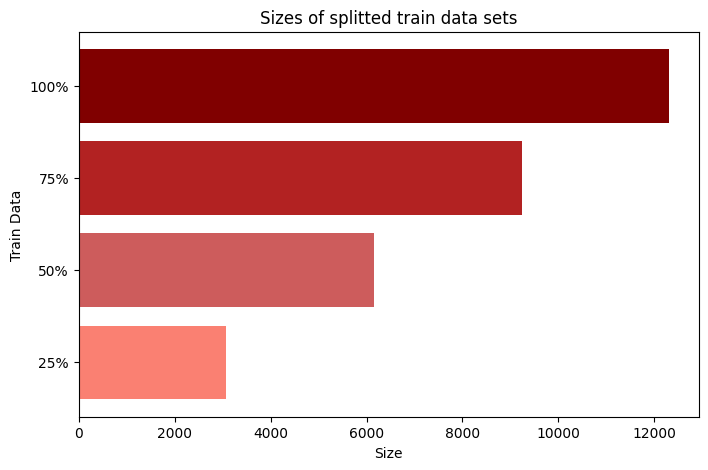

In [14]:

# Data for the bar chart
sizes = [train_25.shape[0], train_50.shape[0], train_75.shape[0], train_100.shape[0]]
labels = ['25%', '50%', '75%', '100%']

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(labels, sizes)
colors = ['salmon', 'indianred', 'firebrick', 'maroon']

#Create a horizontal bar chart
plt.barh(labels, sizes, color=colors)

# Add a title and labels to the chart
ax.set_title('Sizes of splitted train data sets')
ax.set_xlabel('Size')
ax.set_ylabel('Train Data')

# Display the plot
plt.show()

# Method 1


Outline of the this section:

* Data cleaning
* Handling Imbalanced data
* Converting data into Vectorization
* Model Initialization
* Training and validating a model using training and validation dataset
* Saving a trained model
* Training with different splitted data size
* Loading a model and vectorizer from disk
* Testing the model on testing set and saving the output of the model
* Testing with different splitted data size



**Data Cleaning**

In [15]:
# Creating the function
def spacy_tokenizer1(text):
     #Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(text)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lemma_.lower().strip() for word in doc]

    # Removing stop words and punctuations
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]

    # Cleaning the text
    cleaned_text = re.sub(r"(@[A-Za-z0-a]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|^rt|http.+?","", ' '.join(mytokens))

    # Return preprocessed list of tokens
    return cleaned_text

Below, I am showing that how the above defined *spacy_tokenizer1* function works to clean the data. Here, I have shown only train data, similar to this, all other datas will be cleaned, which will process in *train_method1* function in training model. 

In [16]:
train['tokenized_tweet']=train['tweet'].apply(spacy_tokenizer1)
train.head()


,id,tweet,label,tokenized_tweet
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT,intentional 11th hour attack completely base ...
1,92152,I now have over 6k followers. Only 94k to go ...,NOT,6k follower 94k goal trumptrain maga kag
2,65475,@USER Tom was bought! He is more interested in...,NOT,tom buy interested tom constituent
3,22144,@USER @USER Even her brother thinks she is a m...,OFF,brother think monster url
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF,understand know debate willing spend tim...


**Handling Imbalanced data**

In [17]:
from sklearn.utils import resample
import pandas as pd

def upsample1(df, label_column):
  # convert the string into int
  label_int= {"label": {"NOT":0, "OFF":1}}
  df_int = df.replace(label_int, inplace=False)
   
  # Separate the majority and minority classes
  majority_class=df_int[df_int[label_column]==0]
  minority_class=df_int[df_int[label_column]==1]

  # Upsample the minority class to match the number of samples in the majority class
  minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=123)

  # Concatenate the upsampled minority class and the majority class
  upsampled_df = pd.concat([minority_upsampled, majority_class])

  label_str= {"label": {0:"NOT", 1:"OFF"}}
  df_str = upsampled_df.replace(label_str, inplace=False)
   
  return df_str

Below, I have given table of comparing label-counts of train data before & after resampling, to show how the above defined sampling function works.

In [18]:
train_25_bln=upsample1(train_25,'label')
train_50_bln=upsample1(train_50,'label')
train_75_bln=upsample1(train_75,'label')
train_100_bln=upsample1(train_100,'label') 
# table
from tabulate import tabulate
table_data = [['Sizes', 'Before Resampling', 'After Resampling' ],
            ['train 25%' , train_25['label'].value_counts(), train_25_bln['label'].value_counts() ],
            ['train 50%', train_50['label'].value_counts(),  train_50_bln['label'].value_counts()],
            ['train 75%' , train_75['label'].value_counts(), train_75_bln['label'].value_counts() ],
            ['train 100%',  train_100['label'].value_counts(),  train_100_bln['label'].value_counts()]]            
print(tabulate(table_data, headers= "firstrow", tablefmt="fancy_grid"))

╒════════════╤═══════════════════════════╤═══════════════════════════╕
│ Sizes      │ Before Resampling         │ After Resampling          │
╞════════════╪═══════════════════════════╪═══════════════════════════╡
│ train 25%  │ NOT    2035               │ OFF    2035               │
│            │ OFF    1044               │ NOT    2035               │
│            │ Name: label, dtype: int64 │ Name: label, dtype: int64 │
├────────────┼───────────────────────────┼───────────────────────────┤
│ train 50%  │ NOT    4142               │ OFF    4142               │
│            │ OFF    2015               │ NOT    4142               │
│            │ Name: label, dtype: int64 │ Name: label, dtype: int64 │
├────────────┼───────────────────────────┼───────────────────────────┤
│ train 75%  │ NOT    6177               │ OFF    6177               │
│            │ OFF    3058               │ NOT    6177               │
│            │ Name: label, dtype: int64 │ Name: label, dtype: int64 │
├─────

**Converting data into Vectorization**

In [19]:
def prepare_dataset1(data, vectorizer=None, split='test'):
  if split == 'train':
    vectorizer = TfidfVectorizer() 
    values = vectorizer.fit_transform(data['tweet'].values) #TODO: This is the best way to do this, because you need to use same vectorization method
  else:
    values = vectorizer.transform(data['tweet'].values)

  if split == 'train':
    return values, vectorizer
  else:
    return values

Below, I have shown that how the above defined *prepare_dataset1* function works

In [20]:
train_values, vectorizer = prepare_dataset1(train, split='train')
train_values, vectorizer

(<12313x18367 sparse matrix of type '<class 'numpy.float64'>'
 	with 221939 stored elements in Compressed Sparse Row format>,
 TfidfVectorizer())

**Model Initialization**

RBF SVM (Radial Basis Function Support Vector Machine)

In [21]:
def train_model1(text_vector,label):
  print('Let\'s start training Radial Basis Function Support Vector Machine')
  classifier = svm.SVC(kernel='rbf')
  classifier.fit(text_vector, label)
  #kernel = RBF(length_scale=1.0)
  #classifier = GaussianProcessRegressor()
  #classifier.fit(text_vector, label)

  return classifier

**Training and validating a model using training and validation dataset**

Here, the train_method1 function followed a standard ML pipeline:
* Data reading
* Data clearning
* Convert data to vector/tokenization/vectorization
* Model Declaration/Initialization/building
* Training and validation of the model using training and validation dataset
* Save the trained model
* Load and Test the model on testing set
* Save the output of the model

In [22]:
def train_method1(train_file, val_file, model_dir):
    """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
    
    """
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)
    print("-----------------Data Shape before sampling-----------------")
    print("Train Data Shape:", train_df.shape)
    print("Valid Data Shape:", val_df.shape)

    train_df['tweet']=train_df['tweet'].apply(spacy_tokenizer1)
    val_df['tweet']=val_df['tweet'].apply(spacy_tokenizer1)
    
    train_df = upsample1(train_df, 'label')
    val_df = upsample1(val_df, 'label')
    print("-----------------Data Shape after sampling------------------")

    print("Train Data Shape:", train_df.shape)
    print("Valid Data Shape:", val_df.shape)
    print("-"*60)

    train_label = train_df['label']
    val_label = val_df['label']
    
    train_values, vectorizer = prepare_dataset1(train_df, split='train') 
    val_values= prepare_dataset1(val_df,vectorizer)

    model = train_model1(train_values,train_label)

    model_file, vectorizer_file = save_model1(model, vectorizer, model_dir)

    train_pred_label = model.predict(train_values)
    val_pred_label = model.predict(val_values)

    # print('Train Split')
    train_f1_score = compute_performance(train_label, train_pred_label, split='train')

    # print('Validation Split')
    val_f1_score = compute_performance(val_label, val_pred_label, split='valid')


    return model_file, vectorizer_file

**Saving a trained model**

In [23]:
def save_model1(model, vectorizer, model_dir):
    # save the model to disk
    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(model, open(model_file, 'wb'))

    print('Saved model to ', model_file)

    vectorizer_file = os.path.join(model_dir, 'vectorizer.sav') 
    pickle.dump(vectorizer, open(vectorizer_file, 'wb'))

    print('Saved Vectorizer to ', vectorizer_file)
    print('-'*60)

    return model_file, vectorizer_file 

### **Training with different splitted data size**

In [24]:
print('Train using of 25% of data')
model_25_file, vectorizer_25_file = train_method1(train_25_file, val_file, MODEL_1_25_DIRECTORY)

Train using of 25% of data
-----------------Data Shape before sampling-----------------
Train Data Shape: (3079, 3)
Valid Data Shape: (927, 3)
-----------------Data Shape after sampling------------------
Train Data Shape: (4070, 3)
Valid Data Shape: (1238, 3)
------------------------------------------------------------
Let's start training Radial Basis Function Support Vector Machine
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/25/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/25/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on train set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.9950859761002162
Accuracy:  0.995085995085995
Confusion Matrix:
[[2029    6]
 [  14 2021]]
Precision(macro): 0.995093646443594
Recall(macro): 0.9950859950859952
_________________________Classification Report__________________________
 

In [25]:
print('Train using of 50% of data')
model_50_file, vectorizer_50_file = train_method1(train_50_file, val_file, MODEL_1_50_DIRECTORY)

Train using of 50% of data
-----------------Data Shape before sampling-----------------
Train Data Shape: (6157, 3)
Valid Data Shape: (927, 3)
-----------------Data Shape after sampling------------------
Train Data Shape: (8284, 3)
Valid Data Shape: (1238, 3)
------------------------------------------------------------
Let's start training Radial Basis Function Support Vector Machine
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/50/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/50/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on train set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.9914292161398525
Accuracy:  0.9914292612264607
Confusion Matrix:
[[4116   26]
 [  45 4097]]
Precision(macro): 0.9914396020984853
Recall(macro): 0.9914292612264606
_________________________Classification Report__________________________

In [26]:
print('Train using of 75% of data')
model_75_file, vectorizer_75_file = train_method1(train_75_file, val_file, MODEL_1_75_DIRECTORY)

Train using of 75% of data
-----------------Data Shape before sampling-----------------
Train Data Shape: (9235, 3)
Valid Data Shape: (927, 3)
-----------------Data Shape after sampling------------------
Train Data Shape: (12354, 3)
Valid Data Shape: (1238, 3)
------------------------------------------------------------
Let's start training Radial Basis Function Support Vector Machine
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/75/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/75/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on train set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.9892340867447524
Accuracy:  0.9892342561113809
Confusion Matrix:
[[6135   42]
 [  91 6086]]
Precision(macro): 0.9892650440878351
Recall(macro): 0.9892342561113809
_________________________Classification Report_________________________

In [27]:
print('Train using of 100% of data')
model_100_file, vectorizer_100_file = train_method1(train_100_file, val_file, MODEL_1_100_DIRECTORY)

Train using of 100% of data
-----------------Data Shape before sampling-----------------
Train Data Shape: (12313, 3)
Valid Data Shape: (927, 3)
-----------------Data Shape after sampling------------------
Train Data Shape: (16442, 3)
Valid Data Shape: (1238, 3)
------------------------------------------------------------
Let's start training Radial Basis Function Support Vector Machine
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/100/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/100/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on train set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.9856463822854733
Accuracy:  0.9856465150225033
Confusion Matrix:
[[8128   93]
 [ 143 8078]]
Precision(macro): 0.9856644800155709
Recall(macro): 0.9856465150225033
_________________________Classification Report_____________________

**Loading a model and vectorizer from disk**

In [28]:
def load_model1(model_file, vectorizer_file):
    # load model and vectorizer from disk

    model = pickle.load(open(model_file, 'rb'))

    print('Loaded model from ', model_file)

    vectorizer = pickle.load(open(vectorizer_file, 'rb'))

    print('Loaded Vectorizer from ', vectorizer_file)
    print('-'*60)


    return model, vectorizer

**Testing the model on testing set and saving the output of the model**



In [29]:
def test_method1(test_file, model_file, vectorizer_file, output_dir):
    """
     take test_file, model_file and output_dir as input.
     It loads model and test of the examples in the test_file.
     It prints different evaluation metrics, and saves the output in output directory

     ADD Other arguments, if needed

    Args:
        test_file: Test file name
        model_file: Model file name
        vectorizer_file: Vectorizer file name
        output_dir: Output Directory
    
    """

    test_df = pd.read_csv(test_file)

    test_df['tweet']=test_df['tweet'].apply(spacy_tokenizer1)
    
    test_df = upsample1(test_df, 'label')
    
    test_label = test_df['label']

    model, vectorizer = load_model1(model_file, vectorizer_file) 

    test_values= prepare_dataset1(test_df,vectorizer)

    test_pred_label = model.predict(test_values)

    test_df['out_label']  = test_pred_label # Note how this is saved 

    test_f1_score = compute_performance(test_label, test_pred_label, split='test')

    out_file = os.path.join(output_dir, 'output_test.csv')

    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

    
    # return 

### **Testing with different splitted data size**

In [30]:
print('Testing using model trained on 25% data')
test_method1(test_file, model_25_file, vectorizer_25_file, MODEL_1_25_DIRECTORY)

Testing using model trained on 25% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/25/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on test set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.6014143362262938
Accuracy:  0.6443548387096775
Confusion Matrix:
[[603  17]
 [424 196]]
Precision(macro): 0.7536674118061175
Recall(macro): 0.6443548387096774
_________________________Classification Report__________________________
              precision    recall  f1-score   support

         NOT       0.59      0.97      0.73       620
         OFF       0.92      0.32      0.47       620

    accuracy                           0.64      1240
   macro avg       0.75      0.64      0.60      1240
weighted avg       0.75      0.64      0.60      1240

------------------

In [31]:
print('Testing using model trained on 50% data')
test_method1(test_file, model_50_file, vectorizer_50_file, MODEL_1_50_DIRECTORY)

Testing using model trained on 50% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/50/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on test set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.6301469259691579
Accuracy:  0.6645161290322581
Confusion Matrix:
[[601  19]
 [397 223]]
Precision(macro): 0.7618460060617103
Recall(macro): 0.6645161290322581
_________________________Classification Report__________________________
              precision    recall  f1-score   support

         NOT       0.60      0.97      0.74       620
         OFF       0.92      0.36      0.52       620

    accuracy                           0.66      1240
   macro avg       0.76      0.66      0.63      1240
weighted avg       0.76      0.66      0.63      1240

------------------

In [32]:
print('Testing using model trained on 75% data')
test_method1(test_file, model_75_file, vectorizer_75_file, MODEL_1_75_DIRECTORY)

Testing using model trained on 75% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/75/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on test set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.6261202599452138
Accuracy:  0.6588709677419354
Confusion Matrix:
[[592  28]
 [395 225]]
Precision(macro): 0.7445627144979596
Recall(macro): 0.6588709677419355
_________________________Classification Report__________________________
              precision    recall  f1-score   support

         NOT       0.60      0.95      0.74       620
         OFF       0.89      0.36      0.52       620

    accuracy                           0.66      1240
   macro avg       0.74      0.66      0.63      1240
weighted avg       0.74      0.66      0.63      1240

------------------

In [33]:
print('Testing using model trained on 100% data')
test_method1(test_file, model_100_file, vectorizer_100_file, MODEL_1_100_DIRECTORY)

Testing using model trained on 100% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/1/100/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on test set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.6445837234632068
Accuracy:  0.6733870967741935
Confusion Matrix:
[[594  26]
 [379 241]]
Precision(macro): 0.7565523824920801
Recall(macro): 0.6733870967741935
_________________________Classification Report__________________________
              precision    recall  f1-score   support

         NOT       0.61      0.96      0.75       620
         OFF       0.90      0.39      0.54       620

    accuracy                           0.67      1240
   macro avg       0.76      0.67      0.64      1240
weighted avg       0.76      0.67      0.64      1240

---------------

# **Method 2**

Outline of this section:

* Data cleaning
* Handling Imbalanced data
* Converting data into Vectorization
* Model Initialization
* Training and validating a model using training and validation dataset
* Saving a trained model
* Training with different splitted data size
* Loading a model and vectorizer from disk
* Testing the model on testing set and saving the output of the model
* Testing with different splitted data size

**Note:** In this section, pre-processing will be done similar to Method 1 section, i.e., Data cleaning, Handling Imbalanced data, converting data into vectorization,etc..

**Data Cleaning**

In [34]:
# Creating the function
def spacy_tokenizer2(text):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(text)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lemma_.lower().strip() for word in doc]

    # Removing stop words and punctuations
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations]

    # Cleaning the text
    cleaned_text = re.sub(r"(@[A-Za-z0-a]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|^rt|http.+?","", ' '.join(mytokens))

    # Return preprocessed list of tokens
    return cleaned_text

**Handling Imbalanced data**

In [35]:
from sklearn.utils import resample
import pandas as pd

def upsample2(df, label_column):
   
   # convert the string into int
   label_int= {"label": {"NOT":0, "OFF":1}}
   df_int = df.replace(label_int, inplace=False)
   
   # Separate the majority and minority classes
   majority_class=df_int[df_int[label_column]==0]
   minority_class=df_int[df_int[label_column]==1]

   # Upsample the minority class to match the number of samples in the majority class
   minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=123)

   # Concatenate the upsampled minority class and the majority class
   upsampled_df = pd.concat([minority_upsampled, majority_class])

   label_str= {"label": {0:"NOT", 1:"OFF"}}
   df_str = upsampled_df.replace(label_str, inplace=False)
   
   return df_str

**Converting data into Vectorization**

In [36]:
def prepare_dataset2(data, vectorizer=None, split='test'):
  if split == 'train':
      vectorizer = TfidfVectorizer() 
      values = vectorizer.fit_transform(data['tweet'].values) #TODO: This is the best way to do this, because you need to use same vectorization method
  else:
      values = vectorizer.transform(data['tweet'].values)

  if split == 'train':
      return values, vectorizer
  else:
      return values

**Model Initialization**

In [37]:
def train_model2(text_vector,label):

    print('Let\'s start training Extra Trees Classifier')
    classifier = ExtraTreesClassifier(n_estimators=100)
    classifier.fit(text_vector, label)

    return classifier

**Training and validating a model using training and validation dataset**

Here, the train_method2 function followed a standard ML pipeline:
* Data reading
* Data clearning
* Convert data to vector/tokenization/vectorization
* Model Declaration/Initialization/building
* Training and validation of the model using training and validation dataset
* Save the trained model
* Load and Test the model on testing set
* Save the output of the model

In [38]:
def train_method2(train_file, val_file, model_dir):
    """
     Takes train_file, val_file and model_dir as input.
     It trained on the train_file datapoints, and validate on the val_file datapoints.
     While training and validating, it print different evaluataion metrics and losses, wheverever necessary.
     After finishing the training, it saved the best model in the model_dir.

     ADD Other arguments, if needed.

    Args:
        train_file: Train file name
        val_file: Validation file name
        model_dir: Model output Directory
    
    """
    train_df = pd.read_csv(train_file)
    val_df = pd.read_csv(val_file)
    print("-----------------Data Shape before sampling--------------")
    print("Train Data Shape:", train_df.shape)
    print("Valid Data Shape:", val_df.shape)

    train_df['tweet']=train_df['tweet'].apply(spacy_tokenizer2)
    val_df['tweet']=val_df['tweet'].apply(spacy_tokenizer2)

    train_df = upsample2(train_df, 'label')
    val_df = upsample2(val_df, 'label')
    print("-----------------Data Shape after sampling--------------")

    print("Train Data Shape:", train_df.shape)
    print("Valid Data Shape:", val_df.shape)
    print("-"*60)

    train_label = train_df['label']
    val_label = val_df['label']

    train_values, count_vectorizer = prepare_dataset2(train_df, split='train') 
    val_values= prepare_dataset2(val_df,count_vectorizer)

    model = train_model2(train_values,train_label)

    model_file, vectorizer_file = save_model2(model, count_vectorizer, model_dir)

    train_pred_label = model.predict(train_values)
    val_pred_label = model.predict(val_values)

    # print('Train Split')
    train_f1_score = compute_performance(train_label, train_pred_label, split='train')

    # print('Validation Split')
    val_f1_score = compute_performance(val_label, val_pred_label, split='valid')


    return model_file, vectorizer_file

**Saving a trained model**

In [39]:
def save_model2(model, vectorizer, model_dir):
    # save the model to disk
    model_file = os.path.join(model_dir, 'model.sav')
    pickle.dump(model, open(model_file, 'wb'))

    print('Saved model to ', model_file)

    vectorizer_file = os.path.join(model_dir, 'vectorizer.sav') 
    pickle.dump(vectorizer, open(vectorizer_file, 'wb'))

    print('Saved Vectorizer to ', vectorizer_file)
    print('-------------------------------------------------------------')

    return model_file, vectorizer_file 

### **Training with different splitted data size**

In [40]:
print('Train using of 25% of data')
model_25_file, vectorizer_25_file = train_method2(train_25_file, val_file, MODEL_2_25_DIRECTORY)

Train using of 25% of data
-----------------Data Shape before sampling--------------
Train Data Shape: (3079, 3)
Valid Data Shape: (927, 3)
-----------------Data Shape after sampling--------------
Train Data Shape: (4070, 3)
Valid Data Shape: (1238, 3)
------------------------------------------------------------
Let's start training Extra Trees Classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/25/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/25/vectorizer.sav
-------------------------------------------------------------
Computing different preformance metrics on train set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.9987714981040322
Accuracy:  0.9987714987714987
Confusion Matrix:
[[2034    1]
 [   4 2031]]
Precision(macro): 0.998772582738983
Recall(macro): 0.9987714987714988
_________________________Classification Report__________________________
              precision    r

In [41]:
print('Train using of 50% of data')
model_50_file, vectorizer_50_file = train_method2(train_50_file, val_file, MODEL_2_50_DIRECTORY)

Train using of 50% of data
-----------------Data Shape before sampling--------------
Train Data Shape: (6157, 3)
Valid Data Shape: (927, 3)
-----------------Data Shape after sampling--------------
Train Data Shape: (8284, 3)
Valid Data Shape: (1238, 3)
------------------------------------------------------------
Let's start training Extra Trees Classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/50/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/50/vectorizer.sav
-------------------------------------------------------------
Computing different preformance metrics on train set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.9985514244326412
Accuracy:  0.9985514244326412
Confusion Matrix:
[[4136    6]
 [   6 4136]]
Precision(macro): 0.9985514244326412
Recall(macro): 0.9985514244326412
_________________________Classification Report__________________________
              precision    

In [42]:
print('Train using of 75% of data')
model_75_file, vectorizer_75_file = train_method2(train_75_file, val_file, MODEL_2_75_DIRECTORY)

Train using of 75% of data
-----------------Data Shape before sampling--------------
Train Data Shape: (9235, 3)
Valid Data Shape: (927, 3)
-----------------Data Shape after sampling--------------
Train Data Shape: (12354, 3)
Valid Data Shape: (1238, 3)
------------------------------------------------------------
Let's start training Extra Trees Classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/75/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/75/vectorizer.sav
-------------------------------------------------------------
Computing different preformance metrics on train set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.9971669063658655
Accuracy:  0.997166909502995
Confusion Matrix:
[[6166   11]
 [  24 6153]]
Precision(macro): 0.9971691115959151
Recall(macro): 0.9971669095029949
_________________________Classification Report__________________________
              precision    

In [43]:
print('Train using of 100% of data')
model_100_file, vectorizer_100_file = train_method2(train_100_file, val_file, MODEL_2_100_DIRECTORY)

Train using of 100% of data
-----------------Data Shape before sampling--------------
Train Data Shape: (12313, 3)
Valid Data Shape: (927, 3)
-----------------Data Shape after sampling--------------
Train Data Shape: (16442, 3)
Valid Data Shape: (1238, 3)
------------------------------------------------------------
Let's start training Extra Trees Classifier
Saved model to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/100/model.sav
Saved Vectorizer to  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/100/vectorizer.sav
-------------------------------------------------------------
Computing different preformance metrics on train set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.9967157272361067
Accuracy:  0.9967157280136236
Confusion Matrix:
[[8198   23]
 [  31 8190]]
Precision(macro): 0.9967161983829583
Recall(macro): 0.9967157280136236
_________________________Classification Report__________________________
              precisio

### Testing code

**Loading a model and vectorizer from disk**

In [44]:
def load_model2(model_file, vectorizer_file):
    # load model and vectorizer from disk

    model = pickle.load(open(model_file, 'rb'))

    print('Loaded model from ', model_file)

    vectorizer = pickle.load(open(vectorizer_file, 'rb'))

    print('Loaded Vectorizer from ', vectorizer_file)
    print('-'*60)


    return model, vectorizer

**Testing the model on testing set and saving the output of the model**

In [45]:
def test_method2(test_file, model_file, vectorizer_file, output_dir):
    """
     take test_file, model_file and output_dir as input.
     It loads model and test of the examples in the test_file.
     It prints different evaluation metrics, and saves the output in output directory

     ADD Other arguments, if needed

    Args:
        test_file: Test file name
        model_file: Model file name
        vectorizer_file: Vectorizer file name
        output_dir: Output Directory
    
    """

    test_df = pd.read_csv(test_file)
    
    test_df['tweet']=test_df['tweet'].apply(spacy_tokenizer2)
    
    test_df = upsample2(test_df, 'label')
    
    test_label = test_df['label']

    model, vectorizer = load_model2(model_file, vectorizer_file) 

    test_values= prepare_dataset2(test_df,vectorizer)

    test_pred_label = model.predict(test_values)

    test_df['out_label']  = test_pred_label # Note how this is saved 

    test_f1_score = compute_performance(test_label, test_pred_label, split='test')

    out_file = os.path.join(output_dir, 'output_test.csv')

    print('Saving model output to', out_file)
    test_df.to_csv(out_file)

    
    # return 

**Testing with different splitted data size**

In [46]:
print('Testing using model trained on 25% data')
test_method2(test_file, model_25_file, vectorizer_25_file, MODEL_2_25_DIRECTORY)

Testing using model trained on 25% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/25/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/25/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on test set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.6473923672416135
Accuracy:  0.6758064516129032
Confusion Matrix:
[[595  25]
 [377 243]]
Precision(macro): 0.7594281678029605
Recall(macro): 0.6758064516129032
_________________________Classification Report__________________________
              precision    recall  f1-score   support

         NOT       0.61      0.96      0.75       620
         OFF       0.91      0.39      0.55       620

    accuracy                           0.68      1240
   macro avg       0.76      0.68      0.65      1240
weighted avg       0.76      0.68      0.65      1240

------------------

In [47]:
print('Testing using model trained on 50% data')
test_method2(test_file, model_50_file, vectorizer_50_file, MODEL_2_50_DIRECTORY)

Testing using model trained on 50% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/50/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/50/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on test set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.6515939682650334
Accuracy:  0.6814516129032258
Confusion Matrix:
[[604  16]
 [379 241]]
Precision(macro): 0.7760943827162937
Recall(macro): 0.6814516129032259
_________________________Classification Report__________________________
              precision    recall  f1-score   support

         NOT       0.61      0.97      0.75       620
         OFF       0.94      0.39      0.55       620

    accuracy                           0.68      1240
   macro avg       0.78      0.68      0.65      1240
weighted avg       0.78      0.68      0.65      1240

------------------

In [48]:
print('Testing using model trained on 75% data')
test_method2(test_file, model_75_file, vectorizer_75_file, MODEL_2_75_DIRECTORY)

Testing using model trained on 75% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/75/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/75/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on test set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.6638465622211429
Accuracy:  0.6903225806451613
Confusion Matrix:
[[602  18]
 [366 254]]
Precision(macro): 0.7778621779290229
Recall(macro): 0.6903225806451613
_________________________Classification Report__________________________
              precision    recall  f1-score   support

         NOT       0.62      0.97      0.76       620
         OFF       0.93      0.41      0.57       620

    accuracy                           0.69      1240
   macro avg       0.78      0.69      0.66      1240
weighted avg       0.78      0.69      0.66      1240

------------------

In [49]:
print('Testing using model trained on 100% data')
test_method2(test_file, model_100_file, vectorizer_100_file, MODEL_2_100_DIRECTORY)

Testing using model trained on 100% data
Loaded model from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/100/model.sav
Loaded Vectorizer from  gdrive/MyDrive/./CE807/Assignment2/2200940/models/2/100/vectorizer.sav
------------------------------------------------------------
Computing different preformance metrics on test set of Dataset
------------------------------------------------------------
F1 Score(macro):  0.6817665748900215
Accuracy:  0.7032258064516129
Confusion Matrix:
[[597  23]
 [345 275]]
Precision(macro): 0.7782883768648741
Recall(macro): 0.7032258064516129
_________________________Classification Report__________________________
              precision    recall  f1-score   support

         NOT       0.63      0.96      0.76       620
         OFF       0.92      0.44      0.60       620

    accuracy                           0.70      1240
   macro avg       0.78      0.70      0.68      1240
weighted avg       0.78      0.70      0.68      1240

---------------

# **Model Selection**

**Note:** I have runned all these below given codes in each seperate files to select a best model by evaluating their:
* score
* training time
* prediction time
* confusion_matrix.

While running along with the above two models, my session was crashed after using all available RAM. So, I have just given below the used codes for model selection. 

In [ ]:
"""
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
!pip install -U sentence-transformers -q
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
"""

In [ ]:
"""
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]
    """

In [ ]:
"""
# read in the train, validation, and test data sets as separate data frames
train_data = pd.read_csv(train_file)
valid_data = pd.read_csv(val_file)
test_data = pd.read_csv(test_file)

# concatenate the train and validation data frames vertically
combined_data = pd.concat([train_data, valid_data], ignore_index=True)
"""


In [ ]:
"""
combined_data['tweet']=combined_data['tweet'].apply(spacy_tokenizer2)
combined_data
"""

In [ ]:
"""
combined_data = upsample2(combined_data, 'label')
combined_data.shape
"""

In [ ]:
"""
combined_data['tweet'] = combined_data['tweet'].apply(model.encode)
combined_data.head()
"""

In [ ]:
"""
# convert the string into int
label_int= {"label": {"NOT":0, "OFF":1}}
combined_data_int = combined_data.replace(label_int, inplace=False)
"""

In [ ]:
"""
X =combined_data_int['tweet'].to_list()
Y = combined_data_int['label'].to_list()
"""

In [ ]:
"""
# split the combined data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,stratify=Y, 
                                                    random_state=2200940)
                                                    """

In [ ]:
"""
scores = []
for name, clf in zip(names, classifiers):
    #clf.fit(x_train, y_train)
    #score = clf.score(x_test, y_test)
    #scores.append(score)

scores
"""

In [ ]:
"""
head = 10
for model in classifiers[:head]:
    start = time()
    model.fit(X_train, Y_train)
    train_time = time() - start
    start = time()
    Y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tAccuracy :", accuracy_score(Y_test, Y_pred))
    print("\tf1_score:", f1_score(Y_test, Y_pred))
    print("\tConfusion Matrix:", confusion_matrix(Y_test, Y_pred))
    print()
"""

In [ ]:
"""
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df
"""

In [ ]:
"""
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s
"""

In [ ]:
"""
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)
"""